In [1]:
import numpy as np
from simulation import simulation
import matplotlib.pyplot as plt

### EXAMPLE 

## (1) set up variables
path = 'C:/Users/Clemens/Documents/Jupyter/electrode_geometry/trap_test.json'
na = [21,21,21] # number of points per axis
ne = 10 # number of electrodes
perm = [1,2,0] # move from [ax, rad, height] to [rad, height, axial]
position = [0,0.04,0] # approximate trapping position in mm
order = 2

charge = 1.6021764e-19
mass = 1.67262158e-27 * 40
RF_ampl = 100 
RF_freq = 50e6 #in Hz

In [2]:
#(2) initialize the simulation and import the data
s = simulation(charge,mass)
s.import_data(path,ne,na,perm)

#(3) expand the potential for each electrode to the given spherical harmonic order around the given position
s.expand_field(position,order)

(21, 21)


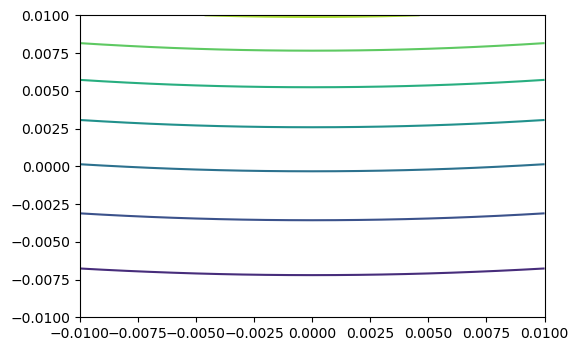

0.018416708039800903 0.03210223322989662
['LI_0', 'LI_1', 'LI_2', 'LI_3', 'LI_4', 'RI_0', 'RI_1', 'RI_2', 'RI_3', 'RI_4']


In [3]:
# plot potentials, as imported to check if they look the same

X,Y = np.meshgrid(s.Z, s.X)
pots = np.array(s.electrode_potentials)
Z = pots[7, :,10,:]
print (Z.shape)
fig, ax = plt.subplots(dpi = 100)
ax.contour(X,Y,Z)
plt.show()
print (np.amin(Z),np.amax(Z))
print (s.electrode_names)

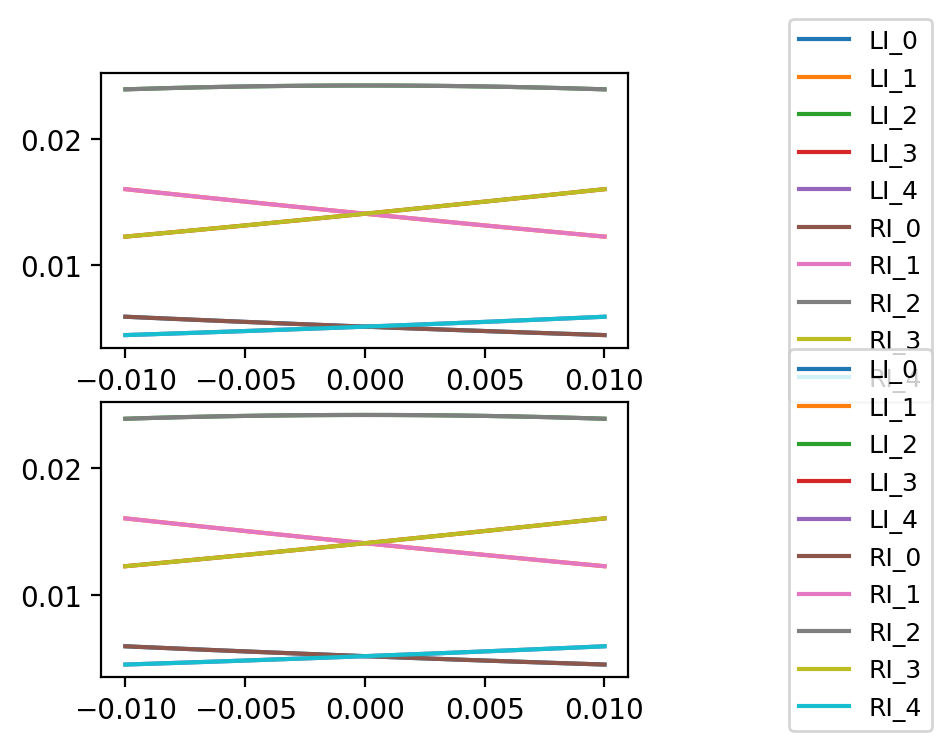

In [4]:
# plot potentials and compare to regenerated potentials. The lines should be symmetric about the trapping position
fig,ax = plt.subplots(2,1, figsize = (3.4,4), dpi = 200)
for n in range(len(s.electrode_positions)):
    ax[0].plot(s.Z,s.electrode_potentials[n][10][10],label = str(s.electrode_names[n]))
    ax[1].plot(s.Z,s.electrode_potentials_regenerated[n][10][10],label = str(s.electrode_names[n]))
ax[0].legend(fontsize = 9, loc='center right', bbox_to_anchor=(1.6, 0.5))
ax[1].legend(fontsize = 9, loc='center right', bbox_to_anchor=(1.6, 0.5))
plt.show()

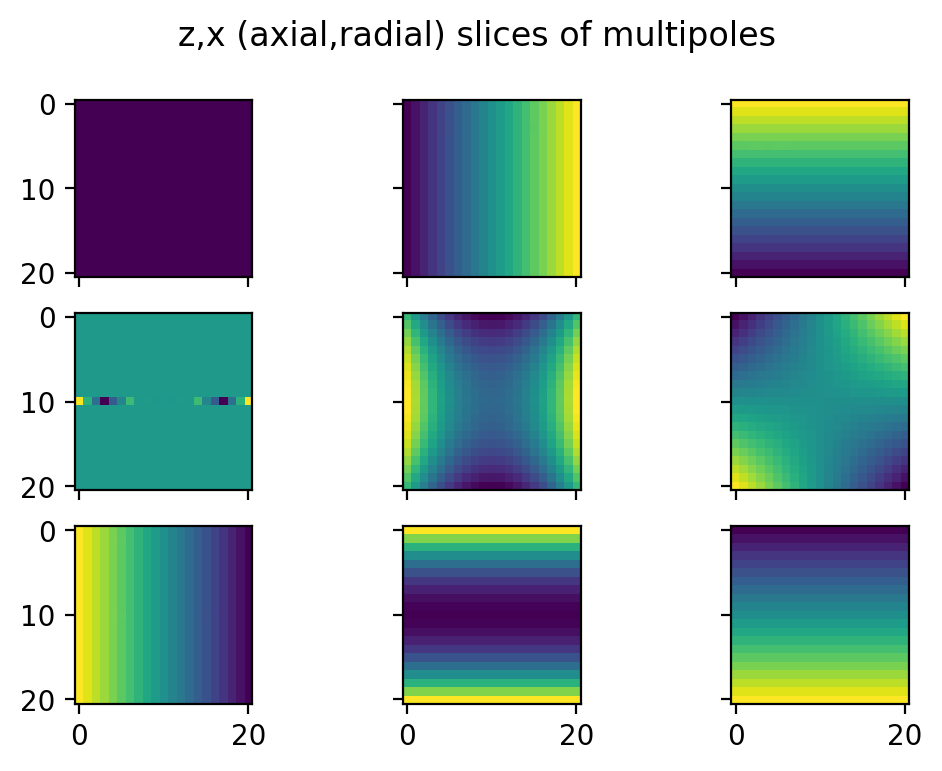

In [5]:
# plot multipoles
fig,ax = plt.subplots(3,3, dpi = 200, sharex = 'all', sharey = 'all')
fig.suptitle('z,x (axial,radial) slices of multipoles')
for i in range(9):
    Y = s.multipoles[:,i]
    Y = Y.reshape(s.nx,s.ny,s.nz)
    ax[np.divmod(i,3)].imshow(Y[:,10,:])
plt.show()

[array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])]


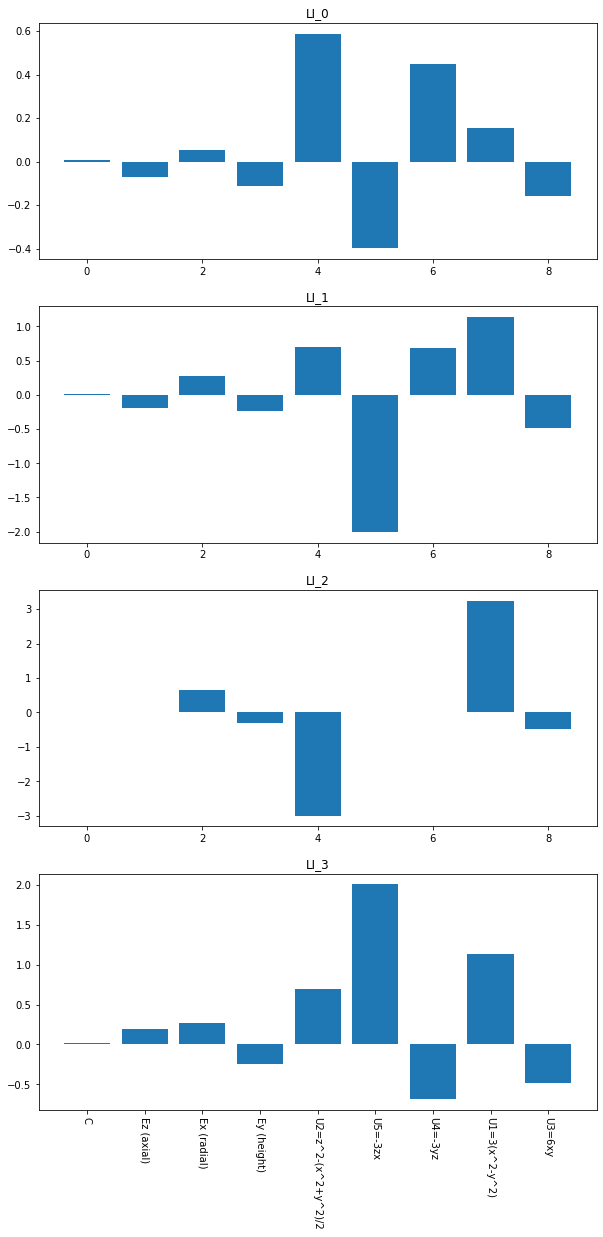

In [6]:
# plot multipole coefficients for some electrodes
v1 = np.zeros(ne)
vs = []
for i in [0,1,2,3]:
    v = v1.copy()
    v[i] = 1
    vs.append(v.copy())
print (vs)
s.plot_multipoleCoeffs(vs,[s.electrode_names[i] for i in [0,1,2,3]])

In [7]:
# (4) optional: remove some multipoles
# usedMultipoles = np.zeros((s.expansion_order+1)**2)
# usedMultipoles[0:6] = np.ones(6)
# s.set_used_multipoles(usedMultipoles)

#(5) invert the expansion from (3) to get the multipole control matrix
s.multipole_control(True)

CAUTION: REGULARIZATION DOESNT ACTUALLY DO ANYTHING


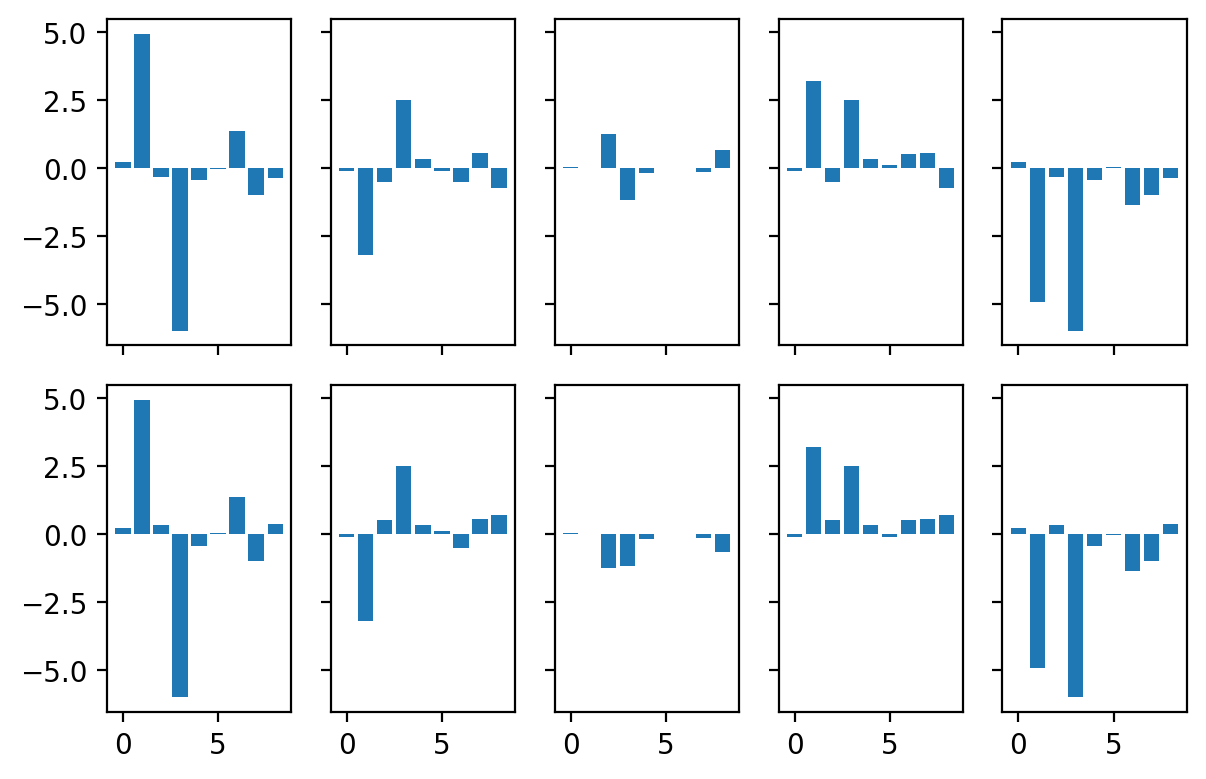

In [10]:
# make some bar plots of the multipole control vectors
multipoleControl = np.array(s.multipoleControl)

# this plot shows the multipole coefficients for all electrodes. Some symmetries should be visible!
fig, axs = plt.subplots(2,np.int(ne/2), dpi = 200, sharex = 'all', sharey = 'all')
for i in np.arange(ne):
    axs[np.divmod(i,np.int(ne/2))].bar(np.arange(9),multipoleControl[:,i])
plt.tight_layout()
plt.show()

# plots of individual multipole coefficients for all electrodes
# fig, axs = plt.subplots(2,np.int(ne/2), dpi = 200, sharex = 'all', sharey = 'all')
# for i in np.arange(ne):
#     axs[np.divmod(i,np.int(ne/2))].bar(np.arange(1),multipoleControl[4:5,i])
# plt.tight_layout()
# plt.show()

In [20]:
#(6) print out the cFile for use in labrad
s.print_cFile('Cfile_test.txt')# file includes *all* multipoles that should be available for the user in the gui.
#(7) optional: print out the same cFile in slightly different format and includes header. Not useful for DAC
# s.print_cFile_general('Cfile_test_general.txt')

[0 1 2 3 4 5 6 7 8 9]
